In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pySaliencyMap
from functions import *

In [ ]:
imgs = []
with open('data/face_placed_list.txt') as f:
    for line in f:
        line = line.strip()
        imgs.append(line)

In [ ]:
img = cv2.imread('data/face_placed/' + imgs[0])
#img = cv2.imread('test2.png')
imgsize = img.shape
img_width  = imgsize[1]
img_height = imgsize[0]
sm = pySaliencyMap.pySaliencyMap(img_width, img_height)

saliency_map = sm.SMGetSM(img)
binarized_map = sm.SMGetBinarizedSM(img)
salient_region = sm.SMGetSalientRegion(img)

fig, ax = plt.subplots(1,2, figsize=(20, 50))
ax[0].set_title('Input image')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Saliency map')
ax[1].imshow(saliency_map)
# plt.subplot(2,2,3)
# plt.imshow(binarized_map)
# plt.subplot(2,2,4)
# plt.imshow(cv2.cvtColor(salient_region, cv2.COLOR_BGR2RGB))

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
imgs = []
with open('data/face_placed_list.txt') as f:
    for line in f:
        line = line.strip()
        imgs.append(line)
        
print(imgs[0])    

0000047_0.png


In [39]:
model = torch.load('train_model_epoch_1')

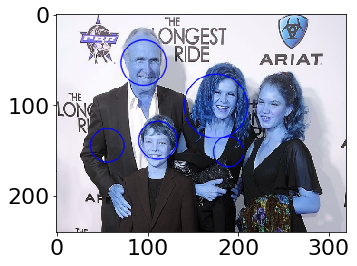

In [65]:
img = 'lollita.jpg'
pred = pass_img(model, img)

imgplt = Image.open(img)
imggray = Image.open(img).convert('L')
res = transforms.Resize([240, 320])
imggray = res(imggray)

filtered_pred_pil = opening_transform(pred, 15)

keypoints, im_with_keypoints = get_blobs(img)
plt.imshow(im_with_keypoints)
faces = get_faces(img, keypoints, filtered_pred_pil)

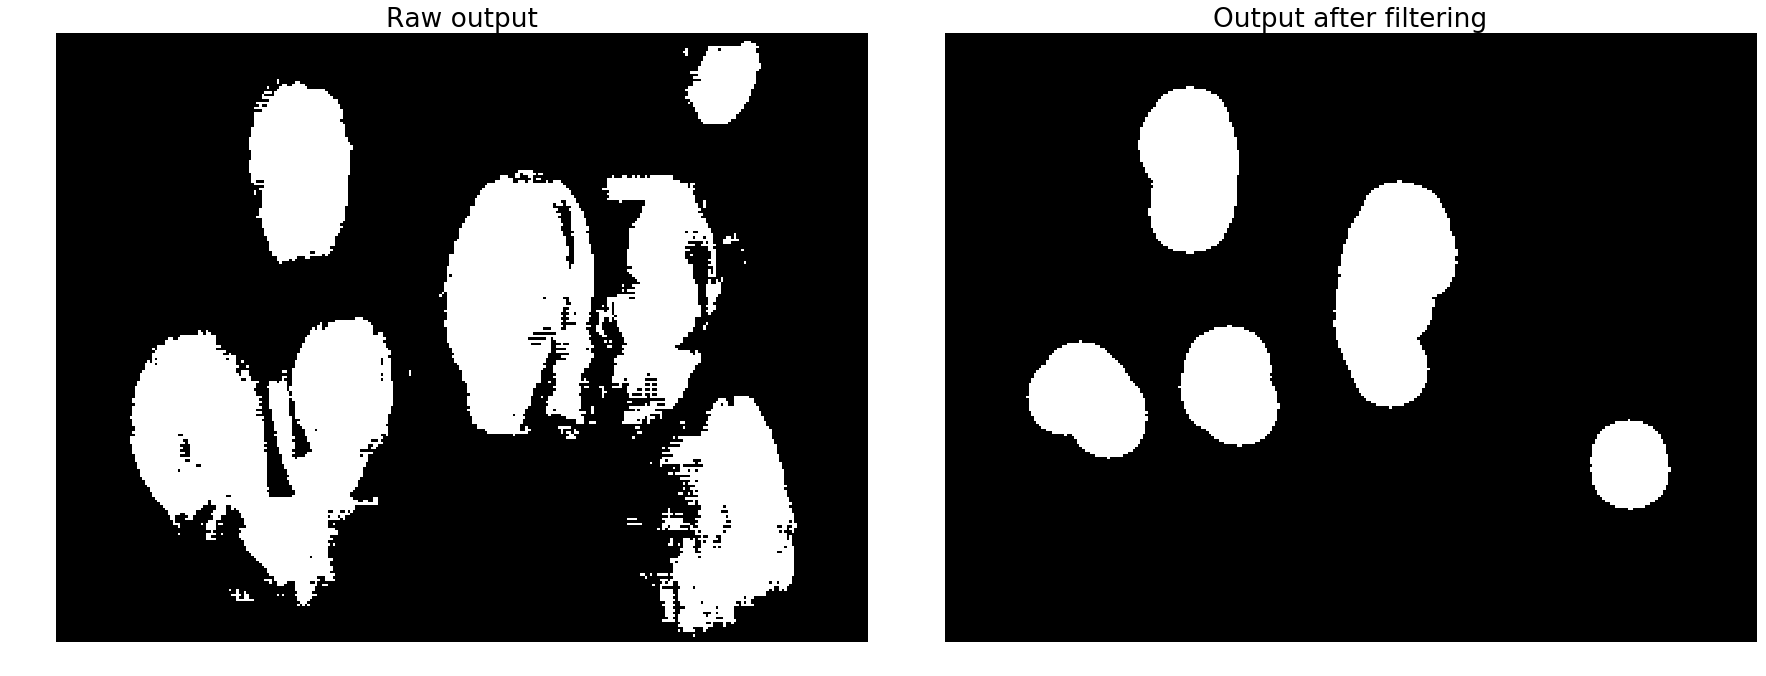

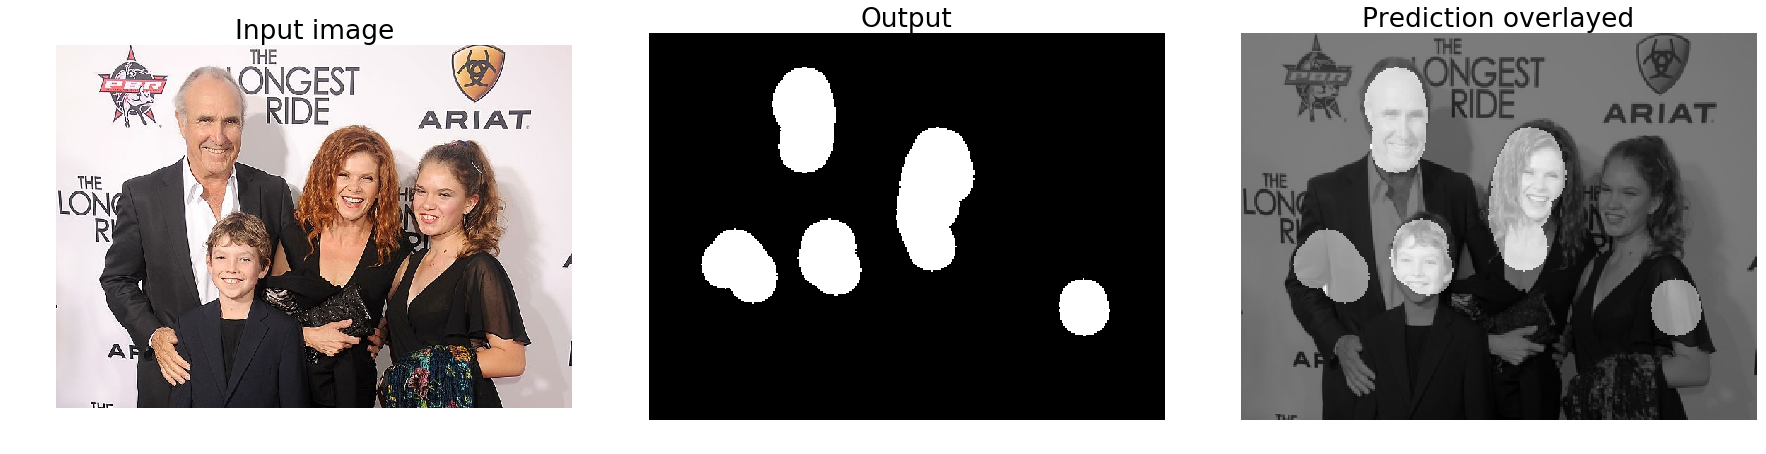

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(25, 25))
plt.rcParams.update({'font.size': 22})
ax[0].imshow(pred.cpu().numpy().squeeze(0), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Raw output')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output after filtering')
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(25, 25))
ax[0].imshow(imgplt)
ax[0].axis('off')
ax[0].set_title('Input image')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output')
ax[2].imshow(Image.blend(imggray, filtered_pred_pil, 0.5))
ax[2].axis('off')
ax[2].set_title('Prediction overlayed')
plt.tight_layout()

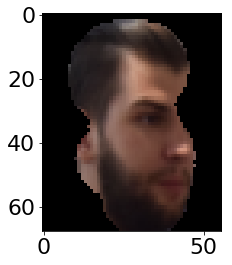

In [60]:
plt.imshow(faces[4])